In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Topic_Survey_Assignment.csv", index_col=0)

In [3]:
df.head()

,Very interested,Somewhat interested,Not interested
Big Data (Spark / Hadoop),1332,729,127
Data Analysis / Statistics,1688,444,60
Data Journalism,429,1081,610
Data Visualization,1340,734,102
Deep Learning,1263,770,136


In [4]:
df = df.sort_values(by='Very interested', axis=0, ascending=False)


In [5]:
df1 = pd.DataFrame()


In [6]:
df1['Very interested'] = df['Very interested'] / (df['Very interested'] + df['Somewhat interested'] + df['Not interested']) 
df1['Somewhat interested'] = df['Somewhat interested'] / (df['Very interested'] + df['Somewhat interested'] + df['Not interested']) 
df1['Not interested'] = df['Not interested'] / (df['Very interested'] + df['Somewhat interested'] + df['Not interested'])

df1

,Very interested,Somewhat interested,Not interested
Data Analysis / Statistics,0.770073,0.202555,0.027372
Machine Learning,0.747248,0.218807,0.033945
Data Visualization,0.615809,0.337316,0.046875
Big Data (Spark / Hadoop),0.608775,0.333181,0.058044
Deep Learning,0.582296,0.355002,0.062702
Data Journalism,0.202358,0.509906,0.287736


In [7]:
df = df1*100
df = df.round(2)

In [8]:
import matplotlib as mlp
import matplotlib.pyplot as plt
import numpy as np

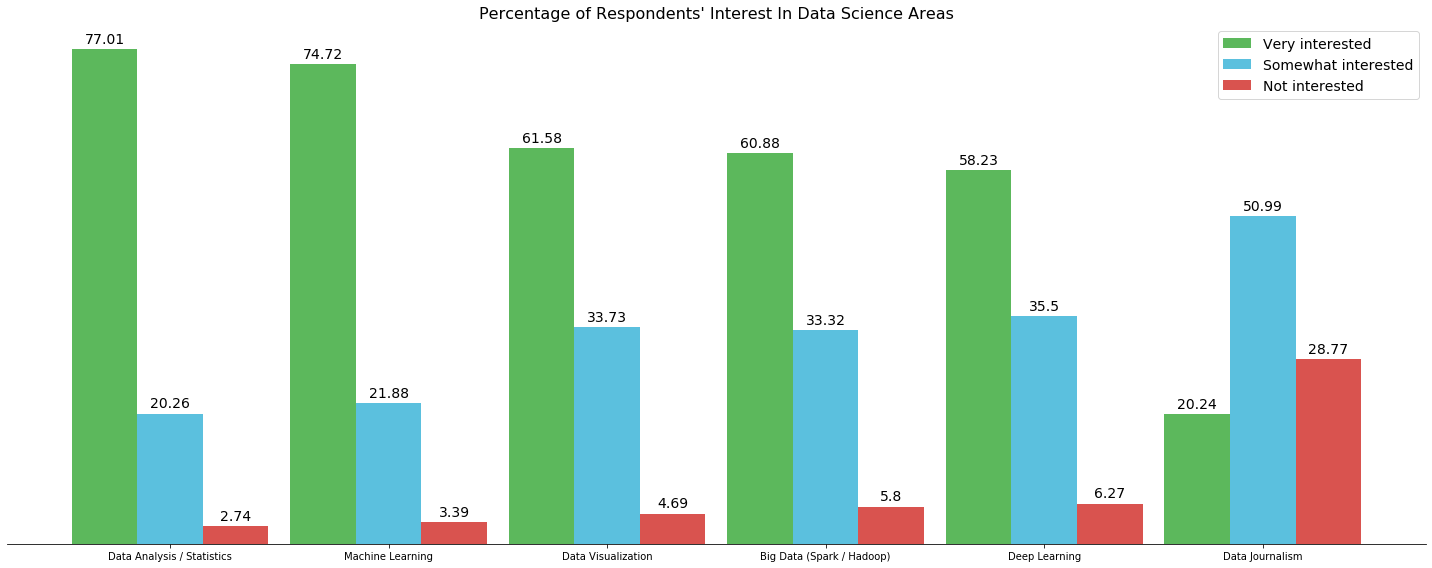

In [9]:
labels =['Data Analysis / Statistics','Machine Learning','Data Visualization','Big Data (Spark / Hadoop)','Deep Learning','Data Journalism']
very_int = df['Very interested']
some_int = df['Somewhat interested']
not_int = df['Not interested']

ind = np.arange(len(very_int))  
width = 0.3

fig, ax = plt.subplots(figsize=(20,8))
rects1 = ax.bar(ind - width, very_int, width, label='Very interested', color='#5cb85c')
rects2 = ax.bar(ind, some_int, width, label='Somewhat interested', color='#5bc0de')
rects3 = ax.bar(ind + width, not_int, width, label='Not interested', color='#d9534f')

ax.set_title("Percentage of Respondents' Interest In Data Science Areas", fontsize=16)
ax.set_xticks(ind)
ax.set_xticklabels((labels))
ax.get_yaxis().set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(fontsize=14)

def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        height = rect.get_height().round(2)
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3, 3),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom', fontsize=14)


autolabel(rects1, "center")
autolabel(rects2, "center")
autolabel(rects3, "center")

fig.tight_layout()

plt.show()